In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [209]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [210]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [211]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [212]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


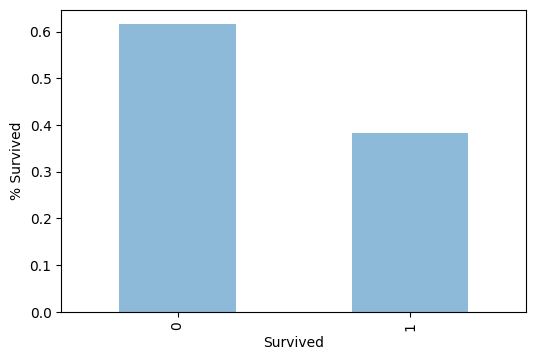

In [213]:
plt.figure(dpi=100)
plt.xlabel("Survived")
plt.ylabel("% Survived")
train_data.Survived.value_counts(normalize=True).plot(kind="bar", alpha = 0.5);

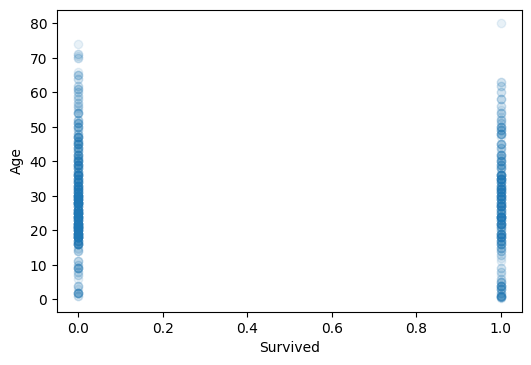

In [214]:
plt.figure(dpi=100)
plt.xlabel("Survived")
plt.ylabel("Age")
plt.scatter(train_data['Survived'], train_data['Age'], alpha=0.1)

<AxesSubplot:xlabel='Pclass', ylabel='% people in Pclass'>

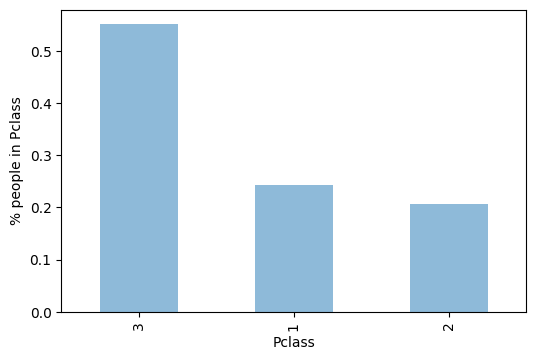

In [215]:
plt.figure(dpi=100)
plt.xlabel("Pclass")
plt.ylabel("% people in Pclass")
train_data.Pclass.value_counts(normalize=True).plot(kind="bar", alpha=0.5)

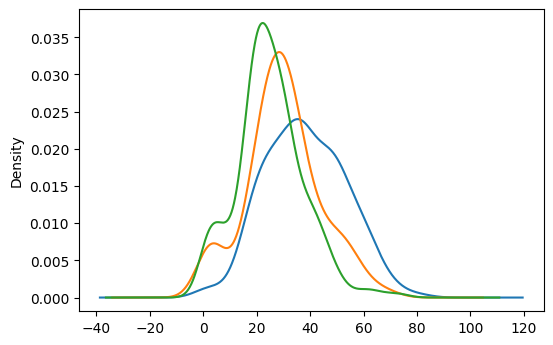

In [216]:
plt.figure(dpi=100)
for pclass in [1,2,3]:
    train_data.Age[train_data.Pclass == pclass].plot(kind="kde")

<AxesSubplot:xlabel='Embarked', ylabel='% Embarked'>

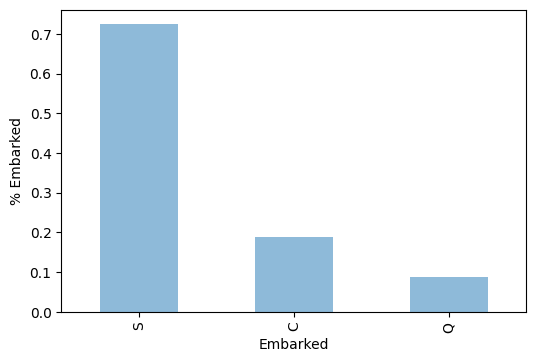

In [217]:
plt.figure(dpi=100)
plt.xlabel("Embarked")
plt.ylabel("% Embarked")
train_data.Embarked.value_counts(normalize=True).plot(kind="bar", alpha=0.5)

Text(0.5, 1.0, 'Women Survived')

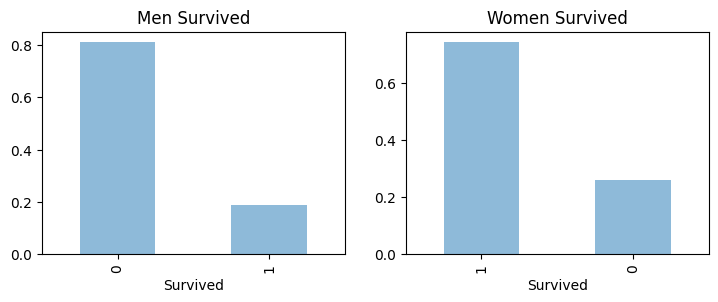

In [218]:
fig = plt.figure(figsize=(18,10), dpi=100)
plt.subplot2grid((3,4), (0,0))
plt.xlabel("Survived")
train_data.Survived[train_data.Sex == "male"].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Men Survived")

plt.subplot2grid((3,4), (0,1))
plt.xlabel("Survived")
train_data.Survived[train_data.Sex == "female"].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Women Survived")

<AxesSubplot:xlabel='Survived', ylabel='% Female Survived'>

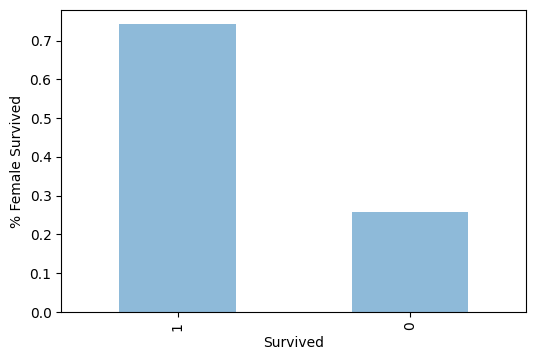

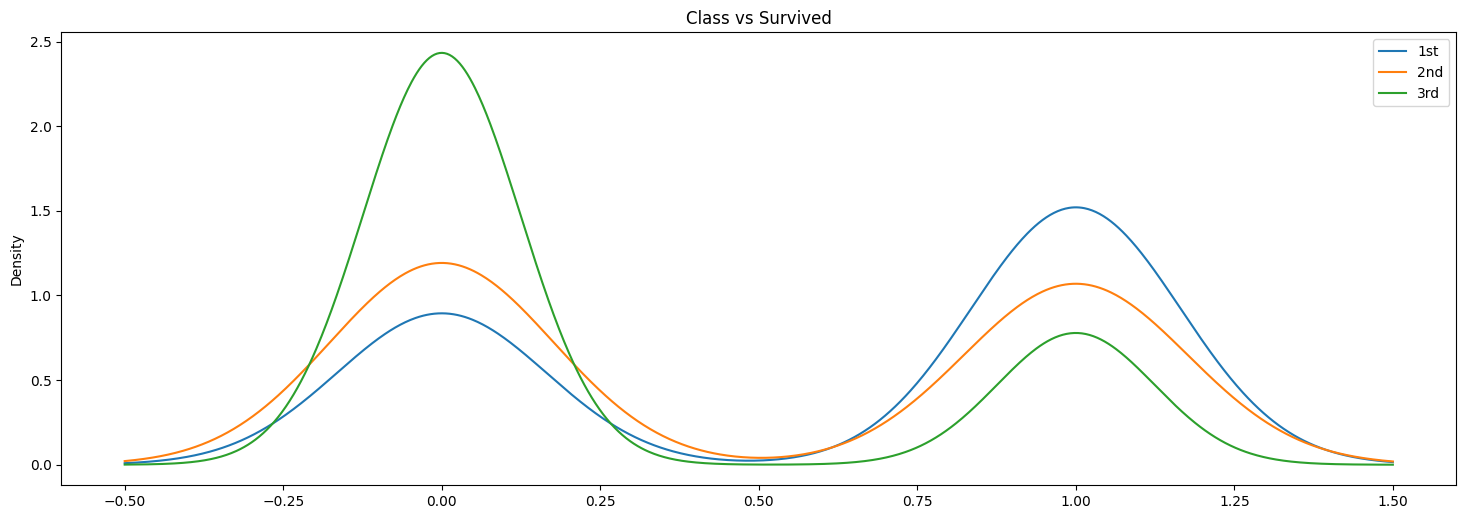

In [219]:
plt.figure(figsize=(18,6), dpi=100)
for pclass in [1,2,3]:
    train_data.Survived[train_data.Pclass == pclass].plot(kind="kde")
plt.title("Class vs Survived")
plt.legend(("1st", "2nd", "3rd"))

<AxesSubplot:xlabel='Pclass,Sex'>

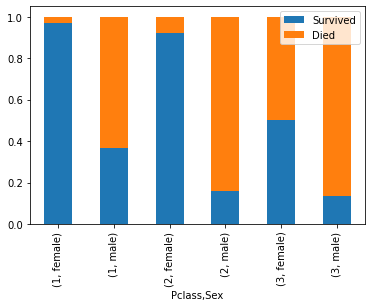

In [220]:
df_plot = train_data.groupby(["Pclass", "Sex"])['Survived'].agg([np.mean, lambda x: 1-np.mean(x)])
df_plot.columns = ["Survived", "Died"]
df_plot.plot.bar(stacked=True)


Text(0.5, 1.0, 'Poor Women Survived')

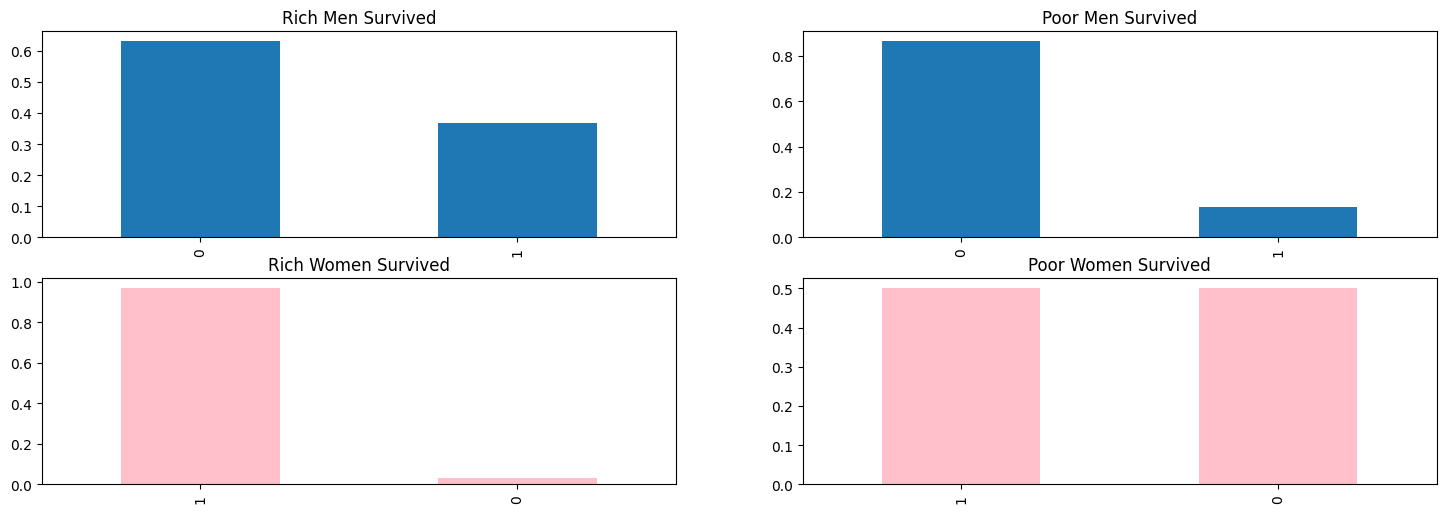

In [221]:
fig = plt.figure(figsize=(18,6), dpi=100)

plt.subplot2grid((2,2), (0,0))
train_data.Survived[(train_data.Pclass == 1) & (train_data.Sex == "male")].value_counts(normalize=True).plot(kind="bar")
plt.title("Rich Men Survived")

plt.subplot2grid((2,2), (0,1))
train_data.Survived[(train_data.Pclass == 3) & (train_data.Sex == "male")].value_counts(normalize=True).plot(kind="bar")
plt.title("Poor Men Survived")

plt.subplot2grid((2,2), (1,0))
train_data.Survived[(train_data.Pclass == 1) & (train_data.Sex == "female")].value_counts(normalize=True).plot(kind="bar", color='#FFC0CB')
plt.title("Rich Women Survived")

plt.subplot2grid((2,2), (1,1))
train_data.Survived[(train_data.Pclass == 3) & (train_data.Sex == "female")].value_counts(normalize=True).plot(kind="bar", color='#FFC0CB')
plt.title("Poor Women Survived")

In [222]:
def bar_chart(feature):
    survived = train_data[train_data["Survived"] == 1][feature].value_counts()
    dead = train_data[train_data["Survived"] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True, figsize=(12,5))

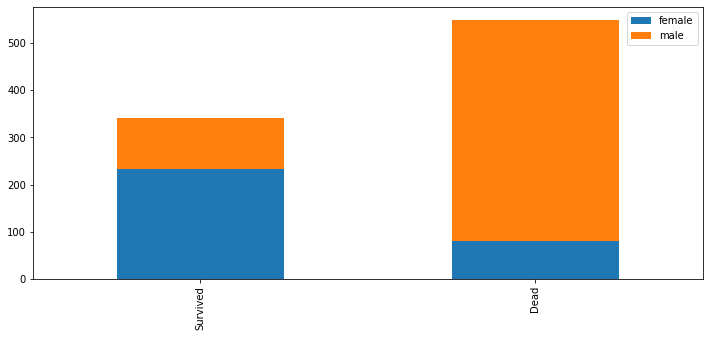

In [223]:
bar_chart("Sex")

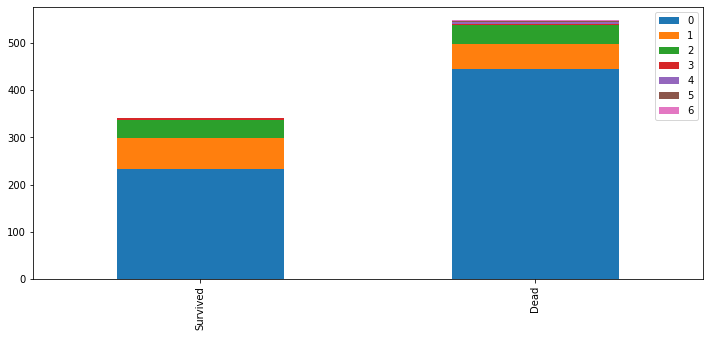

In [224]:
bar_chart("Parch")

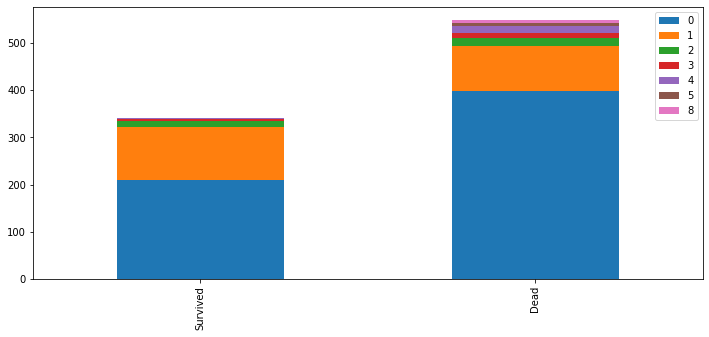

In [225]:
bar_chart("SibSp")

In [226]:
print(train_data.isnull().sum(), end='\n\n')
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [227]:
train_data.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
test_data.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [228]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

In [229]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)

In [230]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [231]:
df_train = train_data.copy()
df_test = test_data.copy()

In [232]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [237]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

df_train = df_train.apply(lambda x: d[x.name].fit_transform(x) if type(x) == object else x)
df_test = df_test.apply(lambda x: d[x.name].transform(x) if type(x) == object else x)

In [238]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [201]:
# df_train.loc[df_train['Sex']=='male', "Sex"] = 0
# df_train.loc[df_train['Sex']=='female', "Sex"] = 1
# df_test.loc[df_test['Sex']=='male', "Sex"] = 0
# df_test.loc[df_test['Sex']=='female', "Sex"] = 1

# df_train.loc[df_train["Embarked"] == "S", "Embarked"] = 0
# df_train.loc[df_train["Embarked"] == "C", "Embarked"] = 1
# df_train.loc[df_train["Embarked"] == "Q", "Embarked"] = 2
# df_test.loc[df_test["Embarked"] == "S", "Embarked"] = 0
# df_test.loc[df_test["Embarked"] == "C", "Embarked"] = 1
# df_test.loc[df_test["Embarked"] == "Q", "Embarked"] = 2

# df_train

In [202]:
df_train.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [203]:
df_train.SibSp = np.log(df_train.SibSp+1)
df_train.Parch = np.log(df_train.Parch+1)
df_train.Fare = np.log(df_train.Fare+1)

df_test.SibSp = np.log(df_test.SibSp+1)
df_test.Parch = np.log(df_test.Parch+1)
df_test.Fare = np.log(df_test.Fare+1)

In [205]:
from sklearn.preprocessing import Normalizer
nm = Normalizer()
df_train = nm.fit_transform(df_train)
df_test = nm.transform(df_test)

ValueError: could not convert string to float: 'male'

In [204]:
df_train.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          1.661245
Parch          1.675439
Fare           0.394928
dtype: float64

In [133]:
y_train = df_train["Survived"].values
feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train = df_train[feature_names].values
X_test = df_test[feature_names].values

## Classifiers

### Logistic Regression (with quadratic features)

In [93]:
from sklearn import linear_model, preprocessing
features = X_train
poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(features)
clf_logr_quad = linear_model.LogisticRegression()
clf_logr_quad.fit(poly_features, y_train)

LogisticRegression()

### Support Vector Machine

In [94]:
from sklearn.svm import SVC

clf_svc = SVC()
clf_svc.fit(X_train, y_train)

SVC()

### Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

### Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

clf_logr = LogisticRegression()
clf_logr.fit(X_train, y_train)

LogisticRegression()

### Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB()

## Evaluate

In [100]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(clf_logr_quad, X, y, scoring="accuracy", cv=50).mean())
print(cross_val_score(clf_svc, X, y, scoring="accuracy", cv=50).mean())
print(cross_val_score(clf_rf, X, y, scoring="accuracy", cv=50).mean())
print(cross_val_score(clf_logr, X, y, scoring="accuracy", cv=50).mean())
print(cross_val_score(clf_dt, X, y, scoring="accuracy", cv=50).mean())
print(cross_val_score(clf_nb, X, y, scoring="accuracy", cv=50).mean())

0.7981699346405229
0.657843137254902
0.8239215686274508
0.7981699346405229
0.7437254901960784
0.7869281045751635


## Grid Search

In [102]:
from sklearn.model_selection import GridSearchCV

### Support Vector Machine

In [22]:
# parameters_svc = {'C': (1, 2, 4, 8, 16, 32), 'kernel': ('linear', 'rbf', 'sigmoid'), 'degree': (3,6,12), 'gamma': ('auto', 'scale')}
# clf_svc = GridSearchCV(SVC(), parameters_svc, cv=5)

clf_svc = SVC(kernel='linear', C=2, gamma='auto', random_state=42)
clf_svc.fit(X_train, y_train)


SVC(C=2, gamma='auto', kernel='linear', random_state=42)

### Random Forest

In [23]:
parameters_rf = {'max_features': ('auto', 'sqrt', 'log2'), 'min_samples_leaf': (1, 50, 100, 200)}
clf_rf = GridSearchCV(RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42), parameters_rf, cv=5)
clf_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=200, n_jobs=-1,
                                              random_state=42),
             param_grid={'max_features': ('auto', 'sqrt', 'log2'),
                         'min_samples_leaf': (1, 50, 100, 200)})

### XGBoost

### Logistic Regression

In [25]:
# parameters_logr = {'penalty': ('l1', 'l2', 'elasticnet', 'none'), 'fit_intercept': (True, False), 'C': (1,2,4,8,16,32), 'solver' : ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}
# clf_logr = GridSearchCV(LogisticRegression(n_jobs=-1, random_state=42), parameters_logr, cv=5)
# clf_logr.fit(X_train, y_train)

### Decision Tree

In [103]:
parameters_dt = {'criterion': ('gini', 'entropy'), 'max_depth': (2,4,8,16,32,64), 'min_samples_split': (2,4,8,16,32,64), 'min_samples_leaf':(2,4,8,16,32,64)}
clf_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters_dt, cv=50)
clf_dt.fit(X_train, y_train)

GridSearchCV(cv=50, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (2, 4, 8, 16, 32, 64),
                         'min_samples_leaf': (2, 4, 8, 16, 32, 64),
                         'min_samples_split': (2, 4, 8, 16, 32, 64)})

### Naive Bayes

In [27]:
# parameters_nb = {}
# clf_nb = GridSearchCV(GaussianNB(), parameters_nb, cv=5)
# clf_nb.fit(X_train, y_train)

## Reevaluation

In [107]:
# print(clf_svc.score(X_dev, y_dev))
# print(clf_rf.score(X_dev, y_dev))
# print(clf_logr.score(X_dev, y_dev))
print(cross_val_score(clf_dt, X, y, scoring="accuracy", cv=2, n_jobs=-1).mean())
# print(clf_nb.score(X_dev, y_dev))

0.7677054466670026


## Save Prediction

In [134]:
# predictions = clf_svc.predict(df_test)
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('svm_submission.csv', index=False)

# predictions = clf_rf.predict(df_test)
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('rf_submission.csv', index=False)

# predictions = clf_logr.predict(df_test)
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('logr_submission.csv', index=False)

predictions = clf_dt.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('dt_submission.csv', index=False)

# predictions = clf_nb.predict(df_test)
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('nb_submission.csv', index=False)